# Introduction to Pandas

This workshop will be focused on the exploration, cleaning and basic visualisation of a prepared set of sample data - the Melbourne CBD Pedestrian Crossing Data. If you have not already downloaded this data from the [Github](https://github.com/resbaz/Pandas_May2018/blob/master/pedestrian_counts.zip), please do so now, and place this data file in the same folder as this jupyter notebook. And remember, please unzip your folder before trying to use it!

## Learning objectives

Throughout this session we're going to be teaching you a range of tools and skills related to cleaning, manipulation and visualising large datasets. Using the pandas package, we can read in and manipulate large spreadsheets of data, and matplotlib lets you visualise these datasets in a useable, customisable format.

The three over-arching themes I'll be taking you through today are:

- Data examination
- Dataframe manipulation
- Plotting your data with pyplot


## Setting Up

First, we need to import Python's *pandas*, *matplotlib* and *numpy* packages, and then use inline plotting "magic" command so that all plots generated will appear within this notebook instead of in a new browser tab.

While numpy isn't directly related to this course, it's handy for generating random values, which will be useful when learning how to create your own dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## A Basic Pandas Introduction

- creating your own dataframe
    - the "series" object
- subsetting columns
- subsetting rows
    - `head()` and `tail()`
    - slicing
    - `loc` vs `iloc`


### Creating a Dataframe

A Pandas dataframe can be thought of as a collection of lists (of equal length), where each list makes up a column inside your dateframe. 

The key difference between a list and a Pandas column though, is that every single item inside your column _must be of the same data type_. If you have a column of integers, and a single string value, like this, `[1,2,3,4,'seven']`, then every single value inside your column is going to be a string-type.

Instead of using a list - which can take any type of values -, Pandas performs this type-coercion by using a data type called a Series.

In [8]:
pd.Series([1,2,'-','-',5])

0    1
1    2
2    -
3    -
4    5
dtype: object

Each "Series" object can be thought of as it's own miniature dataframe. So our previous example would be a dataframe with one column, and 5 rows.

Therefore, when creating a dataframe, you actually have to create it as a collection of these "Series" objects

In [9]:
# np.random.randn(), index = [47,48,49,1,2,3]
df = pd.DataFrame({"A":['a','b','c','d','e','f'],
                   "B":np.random.randn(6),
                   "C": [1,7,20,59,30,40]},
                  index = [47,48,49,1,2,3]
    )

In [10]:
df

,A,B,C
47,a,-0.867472,1
48,b,-0.656514,7
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


#### Subsetting Columns

To select a particular column in your dataframe, you can use one of two options:

1) Calling the column as an "attribute"
    - `df.columnName`

2) Subsetting the dataframe
    - `df['columnName']`

The first option is useful for some functions, but the second form is essential if you want to call more than column at once. You do this by inserting a list, [], of column names, instead a single column.

For example: `df[["Column1", "Column2", ... , etc]]`

We're first going to try this on our toy dataset from earlier, for ease of use.

In [11]:
df

,A,B,C
47,a,-0.867472,1
48,b,-0.656514,7
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


In [12]:
# As a subset
df['A']

47    a
48    b
49    c
1     d
2     e
3     f
Name: A, dtype: object

In [13]:
#As an attribute
df.B

47   -0.867472
48   -0.656514
49   -1.316669
1     0.137304
2    -0.872810
3    -0.073563
Name: B, dtype: float64

In [14]:
# Try subsetting the first two columns
df[['A','B']]

,A,B
47,a,-0.867472
48,b,-0.656514
49,c,-1.316669
1,d,0.137304
2,e,-0.872810
3,f,-0.073563


In [18]:
# What happens if you change the order around?
df[['B',"A"]]

In [16]:
# What about a column that doesn't exist?
df['a']

KeyError: 'a'

#### Slicing

Sometimes you need to examine specific rows and columns in the middle of your data though. Instead, you can use index slicing.

Slicing works similarly to how you might slice a string, or a list. You simply call the indexes of the rows you want from the dataframe: `df[rowNumbers]`

In [21]:
df[2:6] # Gives rows 0,1,2

,A,B,C
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


In [20]:
#gives rows 0 through 7 of Location and Counts
df[["A", "B"]][:3]

,A,B
47,a,-0.867472
48,b,-0.656514
49,c,-1.316669


#### `loc` vs `iloc`
You can also use `loc` and `iloc` to slice rows and columns.

`iloc` is positional based, so only takes integer values that correlate with the row and column numbers you want to subset

`loc` is label based, and takes the row and column **labels** as inputs

In [23]:
#Using iloc to get rows 0, 1 and 2
df.iloc[:3,:2]

,A,B
47,a,-0.867472
48,b,-0.656514
49,c,-1.316669


In [26]:
df

,A,B,C
47,a,-0.867472,1
48,b,-0.656514,7
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


In [27]:
# Using loc to get row labels 1, 2 and 3
df.loc[1:3,["B",'C']]

,B,C
1,0.137304,59
2,-0.872810,30
3,-0.073563,40


If you only enter one set of values into `loc` and `iloc`, they will return the values for every column in your dataset.

By using a second integer though, you can choose which rows and columns you specifically want to subset. The first value corresponds to the row, and the second to the columns, or rows x columns. You can also think of this with the moniker *"Roman Catholic"*

In [ ]:
# Using loc to get row labels 1, 2 and 3 for Columns A and B


In [ ]:
# Using iloc to get rows 0, 1 and 2 for columns 0 and 1.


The differences between `loc` and `iloc` can seem minor, but they're very important, and which one you should use depends on what your needs are at the time.

`iloc` is based on dataframe position, so calling `iloc[:3]` would give you rows 0 through 3. 

`loc` however is based on the index label, so if you were to call `df.loc[:3]`, it would give you all rows UP TO the row labelled as index 3.

While the indexes are in order and all present, this isn't an issue. Consider what happens when the indexes are out of order though, with our dataframe 's'

In [32]:
# Can see that this only takes the first 2 rows
df.iloc[:6]

,A,B,C
47,a,-0.867472,1
48,b,-0.656514,7
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


In [33]:
# Whereas this takes all rows UP TO index label 2
df.loc[]

,A,B,C
47,a,-0.867472,1
48,b,-0.656514,7
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


Since `loc` is based on labels, if you try to subset a row or column label that doesn't exist, even if it corresponds to a positional row, python will throw you an error

Due to this, it's important that you carefully consider which tool is appropriate for your needs

#### Challenge 1

Consider the following Python dictionary data and Python list labels:

```Python 
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**Part 1**

Create a DataFrame `vet_info` from this dictionary data which has the index (i.e. row names) `labels`

In [42]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [36]:
vet_info = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
,index = )

In [37]:
vet_info

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


**Part 2**

Return the first 3 rows of the DataFrame `vet_info`.

In [38]:
vet_info.iloc[:3]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


**Part 3** 

Select just the 'animal' and 'age' columns from `vet_info`.

In [39]:
vet_info[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**Part 4** 

Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].

In [41]:
vet_info.loc[['c','d','h'],["animal","age"]]

vet_info[["animal","age"]].iloc[[3, 4, 8]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


# Working with Data

## Reading in Data

The first step to any data exploration and manipulation is to open your data within your program. The **pandas** package can directly read in spread-sheet style data and convert them into *dataframes*.

These dataframes work with rows and columns, like a spreadsheet, except that all data within a single column has to be the same data type. 

For example, imagine you had a spreadsheet containing two columns - "labels" and "numbers", and that the rows in the "labels" column contains either a text or number sequence. Because you cannot turn text into a number, every single row in that "labels" column would need to be a string (text) type. Similarly, if some (but not all) of the rows in the "numbers" column contained decimals, **all** of the rows within this column would need to be of a decimal (float) data type.

To read in a comma-separated file, or \*.csv, you can use the pandas function `read_csv()`

In [43]:
# Reading in a *.csv file
pdsn = pd.read_csv("pedestriancounts_melbourne.csv")

You can also open a variety of other file types using the "reader" functions found in this [IO tools documentation](http://pandas.pydata.org/pandas-docs/version/0.20/io.html "Pandas IO tools"). 

This includes file types such as excel (\*.xlsx) files, and text (\*.txt) files. You can use the parameters within these functions to specify file or data attributes such as column separators, whether there's column/row names, and even specifying your own column names.

In [44]:
pdsn.head()

,01-Jan-2012,Sunday,0,4,Town Hall (West),3363
0,01-Jan-2012,Sunday,0,17.0,Collins Place (South),549.0
1,01-Jan-2012,Sunday,0,18.0,Collins Place (North),382.0
2,01-Jan-2012,Sunday,0,16.0,Australia on Collins,781.0
3,01-Jan-2012,Sunday,0,2.0,Bourke Street Mall (South),1015.0
4,01-Jan-2012,Sunday,0,1.0,Bourke Street Mall (North),826.0


Oops! It appears that our data doesn't actually have any headers, so our column have been read in with the incorrect names. 

Fortunately, pandas.read_csv() has a range of keyword arguments we can use while reading in our data.

- `sep`: the type of separator between our columns
-  `header`: the row number to take as the start of the data. Useful if you have metadata attached at the beginning of your file.
- `names`: You can also specify your column names. Takes a list of values. If your file contains no header, also use `header = None`. Otherwise, use `header = 0`.
* `parse_dates`: Treat one or more columns like dates.
* `dayfirst`: Use DD.MM.YYYY format, not month first.
* `infer_datetime_format`: Tell pandas to guess the date format.
- `na_values`: Specify values to be treated as empty.

In [46]:
pdsn = pd.read_csv("pedestriancounts_melbourne.csv",
                   header = None, 
                   names = ["Date","Day","Hour","SensorID","Location","Counts"])

In [96]:
sensors = pd.read_csv("Pedestrian_sensor_locations.csv")

sensors.head()

,Sensor ID,Sensor Name,Sensor Description,Status,Upload Date,Year Installed,Location Type,Geometry,Latitude,Longitude
0,22,Eli274_T,Flinders St-Elizabeth St (East),Installed,19/08/2016 12:39:50 PM +0000,2013,Outdoor,"(-37.8178644478193, 144.965068228214)",-37.817864,144.965068
1,34,Fli32_T,Flinders St-Spark La,Installed,19/08/2016 12:39:50 PM +0000,2014,Outdoor,"(-37.8153798501116, 144.974150495806)",-37.815380,144.974150
2,11,WatCit_T,Waterfront City,Installed,19/08/2016 12:39:50 PM +0000,2009,Outdoor,"(-37.8154565643471, 144.939579299407)",-37.815457,144.939579
3,8,WebBN_T,Webb Bridge,Installed,19/08/2016 12:39:50 PM +0000,2009,Outdoor,"(-37.8229354263742, 144.947175106953)",-37.822935,144.947175
4,7,Fed_T,Birrarung Marr,Installed,19/08/2016 12:39:50 PM +0000,2009,Outdoor,"(-37.8183237506589, 144.971414820121)",-37.818324,144.971415


In [48]:
pdsn.head()

,Date,Day,Hour,SensorID,Location,Counts
0,01-Jan-2012,Sunday,0,4.0,Town Hall (West),3363.0
1,01-Jan-2012,Sunday,0,17.0,Collins Place (South),549.0
2,01-Jan-2012,Sunday,0,18.0,Collins Place (North),382.0
3,01-Jan-2012,Sunday,0,16.0,Australia on Collins,781.0
4,01-Jan-2012,Sunday,0,2.0,Bourke Street Mall (South),1015.0


## Examining your Data

- `head()`, `tail()`
- `shape`; `shape[0]` vs. `shape[1]`
- `columns`
- `dtypes`
- `describe()`
- Subsetting with conditionals


One of the first steps in exploring your data is to see what it looks like, what data types are present, and how many rows/columns there are.

For example, `df.head()` and `df.tail()` show you the first/last 5 rows of your dataframe selection

In [50]:
pdsn.tail(20)

,Date,Day,Hour,SensorID,Location,Counts
656803,14-Feb-2015,Saturday,1,19.0,Chinatown-Swanston St (North),282.0
656804,14-Feb-2015,Saturday,1,22.0,Flinders St-Elizabeth St (East),292.0
656805,14-Feb-2015,Saturday,1,27.0,QV Market-Peel St,23.0
656806,14-Feb-2015,Saturday,1,28.0,The Arts Centre,66.0
656807,14-Feb-2015,Saturday,1,31.0,Lygon St (West),106.0
656808,14-Feb-2015,Saturday,1,30.0,Lonsdale St (South),329.0
656809,14-Feb-2015,Saturday,1,33.0,Flinders St-Spring St (West),16.0
656810,14-Feb-2015,Saturday,1,34.0,Flinders St-Spark La,26.0
656811,14-Feb-2015,Saturday,1,39.0,Alfred Place,43.0
656812,14-Feb-2015,Saturday,1,38.0,Flinders St-Swanston St (West),841.0


You can also specify how many rows you want `head` and `tail` to return

In [ ]:
pdsn.head(20)

The `shape` function gives you the dimensions of your data, in the form `(#rows, #columns)`.

In [54]:
# This returns a tuple (or linked pairs) of the number of rows and columns in your dataframe.
pdsn.shape

(656823, 6)

So we can see here that we have 658,823 rows, and 6 columns in our dataframe

In [55]:
# Calling the first or second element of the tuple can give you either the rows or the columns
#Gives you the rows (remember, 0 indexing!)
print(pdsn.shape[0])

#Gives you the columns
print(pdsn.shape[1])

656823
6


You can also use `df.columns` to examine the column names.

In [62]:
# What are the column names in your dataframe?
pdsn.columns

Index(['Date', 'Day', 'Hour', 'SensorID', 'Location', 'Counts'], dtype='object')

You can also examine the data types inside your columns using `dtypes`

Knowing what type of data is in your dataframe is extremely important, as it limits what functions you can and can't do on that column. It's useless to try and do string manipulations on an integer, or try to find the sum of a column of names.

Within pandas, str = "object", int = "int64", and float = "float64"

In [64]:
pdsn.head()

,Date,Day,Hour,SensorID,Location,Counts
0,01-Jan-2012,Sunday,0,4.0,Town Hall (West),3363.0
1,01-Jan-2012,Sunday,0,17.0,Collins Place (South),549.0
2,01-Jan-2012,Sunday,0,18.0,Collins Place (North),382.0
3,01-Jan-2012,Sunday,0,16.0,Australia on Collins,781.0
4,01-Jan-2012,Sunday,0,2.0,Bourke Street Mall (South),1015.0


In [63]:
pdsn.dtypes

Date         object
Day          object
Hour          int64
SensorID    float64
Location     object
Counts      float64
dtype: object

Knowing this, you can now examine a quick summary of your data to see what you're working with using `describe()`

In [65]:
pdsn.describe()

,Hour,SensorID,Counts
count,656823.000000,656821.000000,656809.000000
mean,11.499887,14.208978,625.776073
std,6.922519,9.166034,827.166875
min,0.000000,1.000000,0.000000
25%,5.000000,7.000000,63.000000
50%,12.000000,13.000000,262.000000
75%,18.000000,20.000000,874.000000
max,23.000000,40.000000,11284.000000


What you might notice here is that only the *numeric* columns have been returned. To view both your numeric and string/date/other columns, you will need to use the parameter `include`

In [67]:
help(df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generates descriptive statistics that summarize the central tendency,
    dispersion and shape of a dataset's distribution, excluding
    ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Series``. Here are the options:
    
   

In [66]:
pdsn.describe(include = "all")

,Date,Day,Hour,SensorID,Location,Counts
count,656823,656823,656823.000000,656821.000000,656823,656809.000000
unique,1142,7,NaN,NaN,40,NaN
top,07-Feb-2015,Friday,NaN,NaN,Bourke Street Mall (South),NaN
freq,864,94025,NaN,NaN,27361,NaN
mean,NaN,NaN,11.499887,14.208978,NaN,625.776073
std,NaN,NaN,6.922519,9.166034,NaN,827.166875
min,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,NaN,NaN,5.000000,7.000000,NaN,63.000000
50%,NaN,NaN,12.000000,13.000000,NaN,262.000000
75%,NaN,NaN,18.000000,20.000000,NaN,874.000000


As all of this data is output in the same table, the rows which aren't applicable to that data type are filled that NaN's

### Summary Statistics

We can also find specific statistics for each of these columns by using `max()`, `min()`, `count()`, `std()`, and `sum()`. 

Just remember though that many of these functions rely on numeric data types, and will cause errors if used on a str type. Calling `sum()` on a string however will concatentate those strings.

In [69]:
#Try finding the maximum of the Location (a string) column
pdsn.Hour.max()

23

In [70]:
# what about the Standard Deviation (std) of Counts (numeric)?
pdsn.Counts.std()

827.1668745224656

Other useful functions include `mean()` and `unique()`.

Where `mean()` takes the average of numeric data, `unique()` works on both numeric and string data, and gives you a list of all of the unique values within a particular column.


In [74]:
# Unique works on numeric data
pdsn.Day.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [76]:
# As well as on str data
pdsn.Day.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

As this returns a numpy array though, rather than a pandas dataframe or series object, you can use either `len()` or `array.size` to find the number of unique values for that column

In [77]:
# Using the numpy "size" function
# pdsn.Day.unique().size

# Using the len() function
len(pdsn.Day.unique())

7

### Subsetting with conditionals
You can also subset using conditional statements, such as:  
* `==` or `!=`
* `>` or `<`
etc.

For example, if I want to find all of the rows in our toy dataframe, `df` where `C > 30`, I would type:

In [79]:
df[df["C"]>30]

,A,B,C
1,d,0.137304,59
3,f,-0.073563,40


Just as with lists and for loops, etc, you can also combine these conditionals using & {and} , or | {or}

In [84]:
df

,A,B,C
47,a,-0.867472,1
48,b,-0.656514,7
49,c,-1.316669,20
1,d,0.137304,59
2,e,-0.872810,30
3,f,-0.073563,40


In [81]:
#Find the rows where B < 0.5 AND C > 30
df[(df["C"]>30) & (df["B"]< 0.5)]

,A,B,C
1,d,0.137304,59
3,f,-0.073563,40


In [83]:
#You can also get a list of the row indexes for your subset
list(df[(df["C"]>30) & (df["B"]< 0.5)].index)

[1, 3]

Similarly, you can subset using a list of boolean values

In [85]:
# a boolean list. The 1st, 3rd and 5th values are True.
na = [True,False,True,False,True,False]

df[na] #subsets the 1st, 3rd and 5th rows

,A,B,C
47,a,-0.867472,1
49,c,-1.316669,20
2,e,-0.872810,30


#### Challenge 2

**Part 1**

Find how many rows belong to the sensor at Lygon St (West) between the hours of 12am and 2am?

*Hint 1: an entry of "3" in the Hour column means that the pedestrian counts have been monitored from 3am to 4am*

*Hint 2: remember that you find the length of a list, or you can use `array.size`*

In [86]:
pdsn[(pdsn["Location"] == "Lygon St (West)") & (pdsn.Hour >=0) & (pdsn.Hour < 2)].shape

988

**Part 2**

Calculate the sum of all  (the total number of Counts)

In [88]:
# Subset
pdsn[(pdsn["Location"] == "Lygon St (West)") & (pdsn.Hour >=0) & (pdsn.Hour < 2)].Counts.sum()
#Total
pdsn.Counts.sum()

411015357.0

**Part 3**

Calculate the mean pedestrian count seen between (each of):
* 12am and 1am
* 1pm and 2pm
* 10pm and 11pm

At the Melbourne Central crossing

In [94]:
pdsn[(pdsn.Location == "Melbourne Central") & (pdsn.Hour.isin([0,13,22]))].Counts.mean()

1403.4700380005847

##### Optional Extra

Suppose you have DataFrame with 10 columns of real numbers, for example

`df2 = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))`

Which column of numbers has the smallest sum? Find that column's label.

*Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmin.html*

# Manipulating Your Dataframe

- Changing data: `set_value()`
- Finding NaNs: 
    - `count()` 
    - Using booleans: `isnull()`
    - Chaining: `isnull().any()`, `isnull().sum()`
    - Subsetting: `df[df['Column'].isnull()]`
- Data type conversion
- Using the "timestamp" data type
- Adding and deleting columns/rows
- `groupby()`

## Changing data inside your dataframe

Occasionally, you might notice a particular value inside your data frame that you need to change - it could be a singular error, a spelling mistake, etc.

This can be done using the `set_value(index,"column", value)` function. For the index parameter, you can pass it either a single index, or a list, [], of indexes to be replaced. 

`set_value()` works with column/row labels, similar to `loc`, rather than the indexes.

In [99]:

df = pd.DataFrame({"A":['a','b','c',np.nan,'e','f'],
                   "B":np.random.randn(6),
                   "C": [np.nan,7,np.nan,59,np.nan,40]},
                  index = [47,48,49,1,2,3]
    )
df

,A,B,C
47,a,-0.542128,NaN
48,b,1.785010,7.0
49,c,1.259161,NaN
1,NaN,-1.252323,59.0
2,e,0.588372,NaN
3,f,-0.850163,40.0


In [111]:
# Changing index 48 in column  with a d
df.set_value(48,'A','B')

,A,B,C
47,A,0.000000,NaN
48,B,1.785010,7.0
49,C,1.259161,NaN
1,D,0.000000,59.0
2,E,0.588372,NaN
3,F,0.000000,40.0


,B,C
count,6.000000,3.000000
mean,0.164655,35.333333
std,1.228027,26.312228
min,-1.252323,7.000000
25%,-0.773154,23.500000
50%,0.023122,40.000000
75%,1.091464,49.500000
max,1.785010,59.000000


Say that you noticed a repeated spelling error in some of the labels, and wanted to fix them, or change something for more clarity. 

In this instance, let's replace all numbers in column B that are less than 70 with 0's instead.

In [107]:
df.set_value(df[df.B < 0.5].index,"B", 0)

,A,B,C
47,a,0.000000,NaN
48,NaN,1.785010,7.0
49,c,1.259161,NaN
1,d,0.000000,59.0
2,e,0.588372,NaN
3,f,0.000000,40.0


Alternatively, if you want to apply a function to an entire column, you can just reassign it directly (as you could when replacing the value in a dictionary)

In [109]:
df['A'] = df['A'].str.capitalize()

df

,A,B,C
47,A,0.000000,NaN
48,NaN,1.785010,7.0
49,C,1.259161,NaN
1,D,0.000000,59.0
2,E,0.588372,NaN
3,F,0.000000,40.0


## Using `apply`, `applymap` or `map` to change your data

- **apply** iterates over columns and computes the aggregated result value of the function applied to all vals in a column. Creates an aggregate value for the column/s, and returns a Series object.
- **applymap** iterates over the columns of a dataframe and computes a result for each value of the column. Applies your function element by element over your dataframe. Returns a Dataframe.
- **map** similar to applymap, but operates on Series objects only (rather than whole dataframes). Perfect for single column operations. Returns a Series object.




In [112]:
# Apply

# Gives back a series object
df_sum = df[['B','C']].apply(sum)

#total sum
df_sum

B      3.632544
C    106.000000
dtype: float64

In [ ]:
type(df_sum)

In [113]:
# Applymap
df

,A,B,C
47,A,0.000000,NaN
48,B,1.785010,7.0
49,C,1.259161,NaN
1,D,0.000000,59.0
2,E,0.588372,NaN
3,F,0.000000,40.0


In [114]:
df2 = df[["B", "C"]].applymap(lambda x: x + 100)
df2

,B,C
47,100.000000,NaN
48,101.785010,107.0
49,101.259161,NaN
1,100.000000,159.0
2,100.588372,NaN
3,100.000000,140.0


Now say we wanted to replace all of the extended day names (e.g. Saturday) with the shortened versions instead (e.g. Sat).
We could do this with map

In [115]:
# First create a dictionary of the values we want
days = {'Monday': 'Mon',
        "Tuesday": "Tues",
       "Wednesday":"Wed",
       "Thursday":"Thurs",
       "Friday":"Fri",
       "Saturday":"Sat",
       "Sunday":"Sun"}


In [120]:
# Replace our Day column with our new Day column values
# `get` accesses values safely from dictionary
pdsn["Day"] = pdsn["Day"].map(days.get)

In [121]:
#Checking it's worked
pdsn.Day.unique()

array(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], dtype=object)

## Finding Null Data

Earlier, we explored the use of `shape` to determine the dimensions of our dataframe. Another way to do this is with `count`.

In [122]:
pdsn.count()

Date        656823
Day         656823
Hour        656823
SensorID    656821
Location    656823
Counts      656809
dtype: int64

But you can see that not all of the columns have the same length. This is because count sums the number of rows within that column that contain values - so missing data, or NaNs, will cause the count to be smaller.

You can check which columns inside our test dataframe, df, contains null values by using `isnull()`.


In [123]:
df

,A,B,C
47,A,0.000000,NaN
48,B,1.785010,7.0
49,C,1.259161,NaN
1,D,0.000000,59.0
2,E,0.588372,NaN
3,F,0.000000,40.0


In [124]:
df.isnull()

,A,B,C
47,False,False,True
48,False,False,False
49,False,False,True
1,False,False,False
2,False,False,True
3,False,False,False


As you can see, this returns a `True` or `False` boolean value at each point in our dataframe. This is alright for something like this, but what about when we have 12 columns? 1000 rows? 

To get a more informative information, we can also pair `isnull()` with the `any()` function. `any()` will check whether there are any `True` values in the columns of your Dataframe object

In [129]:
#Check for nulls in each column
pdsn.isnull().any(axis = 0)

Date        False
Day         False
Hour        False
SensorID     True
Location    False
Counts       True
dtype: bool

We can also combine `isnull()` and `sum()` to find an exact count of how many NaNs are in each column as well, like `df.isnull().sum()`

In [126]:
pdsn.isnull().sum()

Date         0
Day          0
Hour         0
SensorID     2
Location     0
Counts      14
dtype: int64

## Resolving Null Data

There are 2 ways to resolve Null data - replace it with new data, or delete them.

For the purposes of this training, I'm only going to show you how to delete them (though another section below this will teach you to replace it, for the purposes of your own data investigations).

### Deleting Null Data

Firstly, let's view the columns where SensorID, Location and Counts have null values.

We can do this using the `isnull()` function. As mentioned before, we can subset with a boolean list, which is what `isnull()` returns. Where the test evaluates to 'True', the row is output from the dataframe.

In [131]:
#Show the rows where SensorID has null values
pdsn[pdsn.SensorID.isnull()]

,Date,Day,Hour,SensorID,Location,Counts
312,01-Jan-2012,Sun,17,NaN,Flagstaff Station,35.0
495503,22-Jul-2014,Tues,4,NaN,Lygon St (West),10.0


In [132]:
#Show the rows where Counts has null values
pdsn[pdsn.Counts.isnull()]

,Date,Day,Hour,SensorID,Location,Counts
10,01-Jan-2012,Sun,0,10.0,Victoria Point,NaN
55,01-Jan-2012,Sun,3,17.0,Collins Place (South),NaN
62,01-Jan-2012,Sun,3,15.0,State Library,NaN
116,01-Jan-2012,Sun,6,15.0,State Library,NaN
120,01-Jan-2012,Sun,6,11.0,Waterfront City,NaN
576,02-Jan-2012,Mon,8,4.0,Town Hall (West),NaN
495376,22-Jul-2014,Tues,0,27.0,QV Market-Peel St,NaN
495646,22-Jul-2014,Tues,9,14.0,Sandridge Bridge,NaN
495762,22-Jul-2014,Tues,13,15.0,State Library,NaN
496016,22-Jul-2014,Tues,21,5.0,Princes Bridge,NaN


You can also show *every* row with null values at once using `isnull().any()`. `any()` contains the optional parameter "axis", which allows you to choose whether it operates on the rows or the columns. By default `axis = 0`, which gives you columns, but setting `axis = 1` checks over the rows instead

In [ ]:
pdsn.isnull().any(axis = 0)

In [ ]:
pdsn.isnull().any(axis = 1)

In [133]:
# And remember, we can subset using boolean lists
pdsn[pdsn.isnull().any(axis = 1)]

,Date,Day,Hour,SensorID,Location,Counts
10,01-Jan-2012,Sun,0,10.0,Victoria Point,NaN
55,01-Jan-2012,Sun,3,17.0,Collins Place (South),NaN
62,01-Jan-2012,Sun,3,15.0,State Library,NaN
116,01-Jan-2012,Sun,6,15.0,State Library,NaN
120,01-Jan-2012,Sun,6,11.0,Waterfront City,NaN
312,01-Jan-2012,Sun,17,NaN,Flagstaff Station,35.0
576,02-Jan-2012,Mon,8,4.0,Town Hall (West),NaN
495376,22-Jul-2014,Tues,0,27.0,QV Market-Peel St,NaN
495503,22-Jul-2014,Tues,4,NaN,Lygon St (West),10.0
495646,22-Jul-2014,Tues,9,14.0,Sandridge Bridge,NaN


From here, there are a few ways that we can remove our null data.

The first option is to simply subset for every row except the null values. This can be done by replacing `isnull()` with the `notnull()` command

In [135]:
df[df.C.notnull()]

,A,B,C
48,B,1.78501,7.0
1,D,0.00000,59.0
3,F,0.00000,40.0


In [137]:
pdsn.isnull().any(axis = 1)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10         True
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
656793    False
656794    False
656795    False
656796    False
656797    False
656798    False
656799    False
656800    False
656801    False
656802    False
656803    False
656804    False
656805    False
656806    False
656807    False
656808    False
656809    False
656810    False
656811    False
656812    False
656813    False
656814    False
656815    False
656816    False
656817    False
656818    False
656819    False
656820    False
656821    False
656822    False
Length: 656823, dtype: b

In [ ]:
# Unfortunately notnull() will only work on individual columns at a time, not the whole dataframe
no_nans = pdsn[pdsn.SensorID.notnull() & pdsn.Counts.notnull()]

#Compare to make sure they've worked
print(pdsn.shape)
print(no_nans.shape)

Another way is to take the `isnull().any()` boolean list that we've created, and then subset for all values *except* those.

A handy python trick is that you can quickly invert the values in a True/False list with a `~` symbol

In [138]:
pdsn[~pdsn.isnull().any(axis = 1)].shape

(656807, 6)

Conversely, there's also a dedicated `dropna()` function

`dropna()` can work on either the rows or the columns, and allows you to specify whether you want to remove rows/column where either 'any' or 'all' of the data are nulls. Alternatively, you can set a threshold value, where rows/columns are discarded if they don't contain at least a certain number of non-null values

In [139]:
no_nans = pdsn.dropna(axis = 0, how = 'any')

no_nans.shape

(656807, 6)

If we examine the `tail()` of the altered dataframe though you can see that the row indexes are still the same from before the deletions though. We can fix this using `reset_index()`.

Remember that while the indexes aren't that important if you're using `iloc`, but if you're using `loc` it's important that these index labels are correct.


In [140]:
no_nans.tail()

,Date,Day,Hour,SensorID,Location,Counts
656818,14-Feb-2015,Sat,2,4.0,Town Hall (West),998.0
656819,14-Feb-2015,Sat,2,17.0,Collins Place (South),39.0
656820,14-Feb-2015,Sat,2,18.0,Collins Place (North),17.0
656821,14-Feb-2015,Sat,2,2.0,Bourke Street Mall (South),95.0
656822,14-Feb-2015,Sat,2,13.0,Flagstaff Station,19.0


In [141]:
no_nans = no_nans.reset_index()

In [142]:
no_nans.tail()

,index,Date,Day,Hour,SensorID,Location,Counts
656802,656818,14-Feb-2015,Sat,2,4.0,Town Hall (West),998.0
656803,656819,14-Feb-2015,Sat,2,17.0,Collins Place (South),39.0
656804,656820,14-Feb-2015,Sat,2,18.0,Collins Place (North),17.0
656805,656821,14-Feb-2015,Sat,2,2.0,Bourke Street Mall (South),95.0
656806,656822,14-Feb-2015,Sat,2,13.0,Flagstaff Station,19.0


We can see however, that this method has added in another column, Index, with the original index values. This can be pretty easily resolved by deleting the column (if you don't want to keep that data). But we'll get to that later.

#### Challenge 3

Take this dataframe of malformed flight data.
```Python
flightData = pd.DataFrame({'From': ['LoNDon', 'MAdrid', 'londON','Budapest', 'Brussels'],
                   'To':['paris','miLAN',"Stockholm","PaRiS","LondoN"],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France>', '(British Airways. )', 
                               '<Air France>', '"Swiss Air"']})
```



**Part 1**

Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers.

In [143]:
flightData = pd.DataFrame({'From': ['LoNDon', 'MAdrid', 'londON','Budapest', 'Brussels'],
                   'To':['paris','miLAN',"Stockholm","PaRiS","LondoN"],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France>', '(British Airways. )', 
                               '<Air France>', '"Swiss Air"']})

In [147]:
flightData.set_value(1,"FlightNumber",10055)

,Airline,FlightNumber,From,RecentDelays,To,l
0,KLM(!),10045.0,LoNDon,"[23, 47]",paris,10055
1,<Air France>,10055.0,MAdrid,[],miLAN,10055
2,(British Airways. ),10065.0,londON,"[24, 43, 87]",Stockholm,10055
3,<Air France>,NaN,Budapest,[13],PaRiS,10055
4,"""Swiss Air""",10085.0,Brussels,"[67, 32]",LondoN,10055


**Part 2**

Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [148]:
flightData["From"] = flightData["From"].str.capitalize()
flightData["To"] = flightData["To"].str.capitalize()

In [149]:
flightData

,Airline,FlightNumber,From,RecentDelays,To,l
0,KLM(!),10045.0,London,"[23, 47]",Paris,10055
1,<Air France>,10055.0,Madrid,[],Milan,10055
2,(British Airways. ),10065.0,London,"[24, 43, 87]",Stockholm,10055
3,<Air France>,NaN,Budapest,[13],Paris,10055
4,"""Swiss Air""",10085.0,Brussels,"[67, 32]",London,10055


**Part 3**

In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'

*Hint: strings have a `strip()` function*

In [154]:
flightData["Airline"] = flightData["Airline"].str.strip('"<>(. !)')

In [155]:
flightData

,Airline,FlightNumber,From,RecentDelays,To,l
0,KLM,10045.0,London,"[23, 47]",Paris,10055
1,Air France,10055.0,Madrid,[],Milan,10055
2,British Airways,10065.0,London,"[24, 43, 87]",Stockholm,10055
3,Air France,NaN,Budapest,[13],Paris,10055
4,Swiss Air,10085.0,Brussels,"[67, 32]",London,10055


That ends the "deleting nulls" section of data manipulation. To continue with the exercises, now go to "Converting Data Types, Dataframe Manipulation". 

This next text section will show instead how you might replace your null values with useable data.

### Replacing Nulls - Personal reading section

#### Replacing all null values with a single value
In the Counts column for example, you can see that there are 14 missing values. You might choose to just replace all of these with 0. You can do this using the `fillna()` function, and specifying the value you want to replace it with.


In [ ]:
df = pd.DataFrame({"A": ['a','b','c','d',np.nan],
                 "B": [1,5,np.nan,7,9],
                 "C": np.random.randn(5)})
df

In [ ]:
df['B'] = df['B'].fillna(value=0)

df

`fillna` also allows you to forward (`ffill`) or backfill (`bfill`) your dataframe with the "methods" argument.

Find out more about the options available here:  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

In [ ]:
df["A"] = df["A"].fillna(method = 'ffill')
df

##### Interpolating (Predicting) Missing Data

One option is to use the function `Series.interpolate` to predict and fill in the missing values based on the index

If we examine the function more closely, we can see that it can take multiple arguments, including the prediction method (default = linear), and the direction in which it can replace your data.

Be very careful about using this method though, as it is literally predicting what data *might* have been there, rather than what actually *was* there. This naturally carries some degree of statistical uncertainty, which can be introduced into your data and calculations. If in doubt about which prediction method is appropriate, or the accuracy of your predictions, maintain an unaltered copy of your data (always recommended regardless) and consult a statistician.

In [ ]:
help(df.interpolate)

## Converting Data Types, Dataframe Manipulation

While we currently have a "Date" column, if you go into dtypes you can see that pandas has read this in as string, rather than as a datetime type. If we left it as a string, to get the Month, Day or Year we would need to perform a series of string manipulations every time we wanted to access these values - a costly, redundant and time consuming exercise if trying to use the whole dataframe. 

Instead, we can convert this column to a datetime data type, using the `to_datetime()` function.

Tip: this will take a while, so if you're working on the server try to stagger the run times

In [156]:
no_nans['Date'] = pd.to_datetime(no_nans['Date'])

In [157]:
no_nans.Date.head()

0   2012-01-01
1   2012-01-01
2   2012-01-01
3   2012-01-01
4   2012-01-01
Name: Date, dtype: datetime64[ns]

In [158]:
no_nans.columns

Index(['index', 'Date', 'Day', 'Hour', 'SensorID', 'Location', 'Counts'], dtype='object')

### Adding and Deleting Columns

Adding a column is a pretty simple exercise - just as we would with a dictionary, you create a new key (column) and assign it some data.

Here, let's split our date column so that we can examine statistics for the different months, years, etc, later on.

In [159]:
# Adding a Column with the Day
no_nans['Date2'] = pd.DatetimeIndex(no_nans['Date']).day

In [160]:
# Adding a Column with the Month (from 1-12)
no_nans["Month"] = pd.DatetimeIndex(no_nans['Date']).month

# Adding a Column with the Year
no_nans["Year"] = pd.DatetimeIndex(no_nans['Date']).year

In [161]:
no_nans.head()

,index,Date,Day,Hour,SensorID,Location,Counts,Date2,Month,Year
0,0,2012-01-01,Sun,0,4.0,Town Hall (West),3363.0,1,1,2012
1,1,2012-01-01,Sun,0,17.0,Collins Place (South),549.0,1,1,2012
2,2,2012-01-01,Sun,0,18.0,Collins Place (North),382.0,1,1,2012
3,3,2012-01-01,Sun,0,16.0,Australia on Collins,781.0,1,1,2012
4,4,2012-01-01,Sun,0,2.0,Bourke Street Mall (South),1015.0,1,1,2012


To delete a column, we can simply use the `del` command

In [162]:
del no_nans["index"]

In [163]:
no_nans.head()

,Date,Day,Hour,SensorID,Location,Counts,Date2,Month,Year
0,2012-01-01,Sun,0,4.0,Town Hall (West),3363.0,1,1,2012
1,2012-01-01,Sun,0,17.0,Collins Place (South),549.0,1,1,2012
2,2012-01-01,Sun,0,18.0,Collins Place (North),382.0,1,1,2012
3,2012-01-01,Sun,0,16.0,Australia on Collins,781.0,1,1,2012
4,2012-01-01,Sun,0,2.0,Bourke Street Mall (South),1015.0,1,1,2012


Because of the way our columns are named, we don't currently have anything sensible to call our second date column. We can change these columns names pretty easily to something more sensible

In [166]:
no_nans.columns = ['Timestamp', 'Day', 'Hour', 'SensorID', 'Location', 'Counts', 'Date',
       'Month', 'Year']

Index(['Timestamp', 'Day', 'Hour', 'SensorID', 'Location', 'Counts', 'Date',
       'Month', 'Year'],
      dtype='object')

In [167]:
no_nans.head()

,Timestamp,Day,Hour,SensorID,Location,Counts,Date,Month,Year
0,2012-01-01,Sun,0,4.0,Town Hall (West),3363.0,1,1,2012
1,2012-01-01,Sun,0,17.0,Collins Place (South),549.0,1,1,2012
2,2012-01-01,Sun,0,18.0,Collins Place (North),382.0,1,1,2012
3,2012-01-01,Sun,0,16.0,Australia on Collins,781.0,1,1,2012
4,2012-01-01,Sun,0,2.0,Bourke Street Mall (South),1015.0,1,1,2012


Lets also add another column, Seasons, that tells us which season the traffic is occurring

In [168]:
season_dict = {1: "Summer", 2:"Summer", 3:"Autumn",4:"Autumn",5:"Autumn",
               6:"Winter",7:"Winter",8:"Winter",9:"Spring",10:"Spring",
              11:"Spring",12:"Summer"}


no_nans["Season"] = no_nans["Month"].apply(season_dict.get)

# Check it's been added in
no_nans.Season.unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [171]:
no_nans.head()

,Timestamp,Day,Hour,SensorID,Location,Counts,Date,Month,Year,Season
0,2012-01-01,Sun,0,4.0,Town Hall (West),3363.0,1,1,2012,Summer
1,2012-01-01,Sun,0,17.0,Collins Place (South),549.0,1,1,2012,Summer
2,2012-01-01,Sun,0,18.0,Collins Place (North),382.0,1,1,2012,Summer
3,2012-01-01,Sun,0,16.0,Australia on Collins,781.0,1,1,2012,Summer
4,2012-01-01,Sun,0,2.0,Bourke Street Mall (South),1015.0,1,1,2012,Summer


In [172]:
no_nans[no_nans['Month'].isin([1,2,12])].tail()

,Timestamp,Day,Hour,SensorID,Location,Counts,Date,Month,Year,Season
656802,2015-02-14,Sat,2,4.0,Town Hall (West),998.0,14,2,2015,Summer
656803,2015-02-14,Sat,2,17.0,Collins Place (South),39.0,14,2,2015,Summer
656804,2015-02-14,Sat,2,18.0,Collins Place (North),17.0,14,2,2015,Summer
656805,2015-02-14,Sat,2,2.0,Bourke Street Mall (South),95.0,14,2,2015,Summer
656806,2015-02-14,Sat,2,13.0,Flagstaff Station,19.0,14,2,2015,Summer


### Changing Your Data Types

You can also convert other columns by using the `df[column].astype(<datatype>)` function. This includes 'str', 'int64' and 'float64' data types, amongst others.

You must be careful **not to use `astype()` on a column with null values**. `astype()` does not preserve the null values, and makes resolving them later more difficult.

Let's create a dataframe, df, in an example of converting types

In [173]:
df = pd.DataFrame({'A':['a','b','c',np.nan,'d','e'],
             'B': np.random.randn(6),
             'C': [2.6,np.nan, 8.0, 9.4, 3.3, np.nan]})
df

,A,B,C
0,a,0.129331,2.6
1,b,-0.937829,NaN
2,c,0.494253,8.0
3,NaN,1.099571,9.4
4,d,1.110515,3.3
5,e,-1.501369,NaN


In [175]:
df["A"] = df["A"].astype(str)

In [177]:
df.isnull().any(axis = 0)

A    False
B    False
C     True
dtype: bool

#### Exploration Challenge

Convert column A and C in `df` to `str` and `float`, respectively, and then shown what the resulting values at the previously null indexes are

*Hint: you can get the index of the current null values before the conversion*

#### Challenge 4

Create a new column "D" for our toy dataframe, df. "D" will contain the values from column B + 100. 

_Hint 1: You can test your output by using the "apply" function without assigning it to a new column first_

_Hint 2: you can create your own functions using "lambda". e.g. _`apply(lambda x: ` _`insert stuff with x`_`)`


##### Extension Challenge

Harken back to our `flightData` dataframe from Challenge 3.

In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

*Hint: You can create a new dataframe from the list data in the column by combining `apply` and pd.Series.*  
*Hint 2: `help(df.join)`*

In [ ]:
flightData

## Grouping Data with `groupby`

It's often useful to be able to group the data within a column according to the data in another column. 

For example, you might wish to take the mean pedestrian counts for each month, or each year. We could do this is a complicated and time consuming way where you subset the data for each month, and then take the mean of the Counts column...or we could just use the `groupby` function. `groupby` outputs a reformatted version of your data where all values associated with your "grouping factor" are taken together. You can then perform mathematical and statistical tests on this grouped output (and plotting!), and the tests will be performed within each of the "groups" you defined.

For example, say that we wanted to find the mean pedestrian counts seen in each month:

In [179]:
no_nans.groupby(by=["Month"]).mean()

,Hour,SensorID,Counts,Date,Year
Month,,,,,
1,11.500499,15.090399,602.167428,16.108778,2013.802022
2,11.485237,14.323410,641.116647,13.084635,2013.547492
3,11.500000,12.819942,682.660273,15.955470,2013.189739
4,11.500000,12.720792,657.379868,15.473267,2013.198020
5,11.500231,12.678764,621.398372,16.154492,2013.194434
6,11.500000,13.294060,579.292730,15.474718,2013.219440
7,11.499909,13.361792,616.520401,15.900030,2013.200730
8,11.500000,13.509564,615.328797,16.139774,2013.209416
9,11.503597,14.706936,606.965523,15.617322,2013.198284


Unfortunately these tests are non-discriminatory, and will take the `mean()` of each numeric data column. 

To get the columns you want, such as Counts, you need to specify this in the chained command:

In [182]:
# the mean pedestrian counts within each month
no_nans[["Counts","Month"]].groupby(by = "Month").mean()

,Counts
Month,
1,602.167428
2,641.116647
3,682.660273
4,657.379868
5,621.398372
6,579.292730
7,616.520401
8,615.328797
9,606.965523


In [183]:
# Can also specify multiple columns to be output
    # the mean "Hour" and pedestrian counts within each month
no_nans.groupby(by=["Month"]).mean()[["Counts","Hour"]]

,Counts,Hour
Month,,
1,602.167428,11.500499
2,641.116647,11.485237
3,682.660273,11.500000
4,657.379868,11.500000
5,621.398372,11.500231
6,579.292730,11.500000
7,616.520401,11.499909
8,615.328797,11.500000
9,606.965523,11.503597


We can also choose to only apply to certain columns, or even group by multiple factors

In [185]:
# Just remember to keep the months you're grouping by in your column selection!
no_nans[["Counts","Month","Year"]].groupby(by=["Year","Month"]).mean()

Counts
Year Month            
2012 1      593.921778
     2      664.069604
     3      708.321087
     4      662.224460
     5      640.853569
     6      608.292438
     7      653.820266
     8      633.853719
     9      641.173530
     10     653.699671
     11     652.947454
     12     677.285878
2013 1      614.056783
     2      658.246445
     3      667.956467
     4      658.531867
     5      625.939964
     6      591.016422
     7      639.931293
     8      644.591230
     9      621.340619
     10     607.113297
     11     638.762026
     12     661.754761
2014 1      591.552915
     2      646.541572
     3      676.224474
     4      653.935018
     5      607.479839
     6      557.368794
     7      582.366259
     8      590.099281
     9      577.266101
     10     608.402323
     11     601.042184
     12     623.627575
2015 1      610.483598
     2      587.227723

In [ ]:
# The order of the groupby matters


By chaining more commands together you can also find the maximum, minimum, etc, values for your groups.

In [186]:
# Maximum counts grouped by Month
no_nans.groupby(by=["Month"]).Counts.sum()

45216150.0

But which month is this associated with?

In [187]:
# Finding the Month associated with the maximum value
countSums = no_nans.groupby(by=["Month"]).Counts.sum()

countSums[countSums == countSums.max()]#<-subset condition in here

Month
1    45216150.0
Name: Counts, dtype: float64

You might also it useful to chain groupby and the `aggregate` function together for more functionality. We are limited with being able to apply this in interesting ways in our current dataset, but feel free to do some reading in your own time.

In [ ]:
help(df.aggregate)

#### Challenge 5
**Part 1** Which season has the greatest average Pedestrian traffic? 

In [188]:
seasonsmax = no_nans.groupby(by = "Season").Counts.mean()

seasonsmax[seasonsmax == seasonsmax.max()]

Season
Autumn    653.722896
Name: Counts, dtype: float64

**Part 2** Which year has the greatest standard deviation in pedestrians?

In [189]:
yearstd = no_nans.groupby(by = "Year").Counts.std()

yearstd[yearstd == yearstd.max()]

Year
2012    880.866814
Name: Counts, dtype: float64

**Part 3** Which hour, of which day, sees the greatest average pedestrian traffic overall?

Hint: `help(df.sort_values)` might be useful

In [195]:
no_nans[["Counts","Hour", "Day"]].groupby(by = ["Hour", "Day"]).mean().sort_values(by = ["Counts"],ascending = False)

Counts
Hour Day               
17   Fri    1706.545687
     Thurs  1624.508812
     Wed    1612.041103
     Tues   1572.307024
     Mon    1519.460005
13   Fri    1477.868555
12   Fri    1444.317254
16   Fri    1411.262124
13   Thurs  1406.688123
     Wed    1404.723768
12   Wed    1383.820271
13   Mon    1378.568873
     Tues   1369.356668
12   Thurs  1369.101712
     Mon    1346.162024
     Tues   1337.887867
18   Fri    1323.202654
16   Thurs  1292.441890
     Wed    1285.857033
     Tues   1246.507535
     Mon    1241.005878
15   Fri    1222.186830
     Sat    1216.003092
14   Fri    1202.718734
     Sat    1197.093533
16   Sat    1187.859830
14   Sun    1174.966999
13   Sat    1174.768874
8    Wed    1163.281082
     Tues   1162.520562
...                 ...
6    Sat      60.247101
1    Fri      55.439112
5    Fri      55.131478
     Wed      53.352145
     Thurs    53.235429
     Tues     52.461951
6    Sun      51.029178
5    Mon      49.239458
1    Thurs    45.328393
5    Sun      45.132771
4    Sat      41.337027
1    Wed      40.921859
5    Sat      40.094306
1    Mon      40.044212
2    Fri      36.303293
1    Tues     32.566139
3    Fri      27.941282
2    Thurs    27.635829
     Mon      25.206491
4    Fri      24.992341
2    Wed      24.324821
4    Mon      20.700230
3    Thurs    20.027345
     Mon      20.003578
2    Tues     19.299030
4    Thurs    19.055712
3    Wed      18.881767
4    Wed      18.550306
     Tues     17.326437
3    Tues     16.151175

[168 rows x 1 columns]

In [199]:
no_nans[["Counts","Hour","Day"]]\
.groupby(by = ['Day',"Hour"]).mean().apply(lambda t: t[t==t.max()])

,,Counts
Day,Hour,
Fri,17,1706.545687


^ Answer `no_nans[["Counts","Hour","Day"]].groupby(by = ['Day',"Hour"]).mean().apply(lambda t: t[t==t.max()])`

# Plotting Your Data

Now that we've examined and cleaned our data, it's time to look at how we might explore that visually.

Pandas has some in-built plotting functionality, that builds off of the traditional matplotlib library, which are reasonably easy to use. However, as Pandas plotting is built-upon matplotlib, customising your plots will require you to understand matplotlib commands. 

This section will teach you the basics of plotting within pandas. This is hardly comprehensive, and please feel free to delve into some of user guides and tutorials and questions available on Google and Stack Overflow to learn more about these tools and how to make them work for you.

A reasonably good matplotlib tutorial can be found at https://matplotlib.org/users/pyplot_tutorial.html

The [matplotlib API](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.html) contains all of the functions you can call within matplotlib, along with detailed information about how you can use them and their parameters

A handy "quick guide" to the different kinds of plotting functions within pyplot can also be found at the [pyplot API](https://matplotlib.org/api/pyplot_api.html)

Let's first try using `df.plot()` on our no_nans dataframe

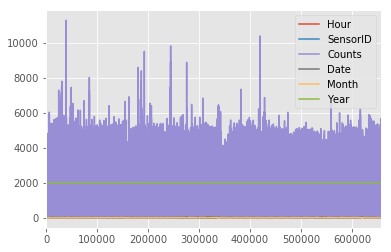

In [200]:
no_nans.plot()
plt.show()

But that's not particularly informative, and much of the graph is completely unreadable.

Matplotlib has great customisability, so let's play around with trying to plot different types of graphs with our data

## Line Plot

Line plots are great for plotting series data, usually a time series of some description.

Line plots are also the default plot drawn when calling `.plot()`.

Within the plot function you can also specify the figure title and the figure size

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 9 Text xticklabel objects>)

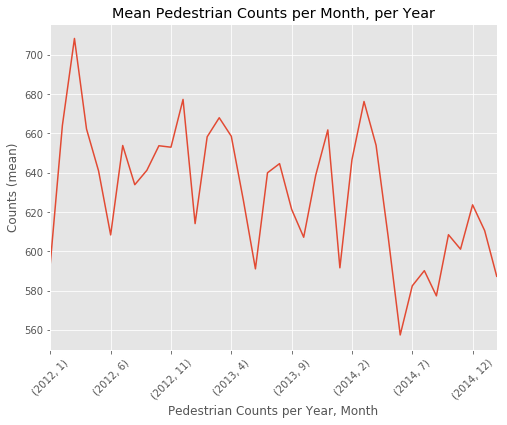

In [202]:
no_nans.groupby(by = ['Year', 'Month']).mean().Counts.plot( # Drawing a pot from the grouped Year, Month data
                                                figsize = (8,6), # The figure size
                                                title = 'Mean Pedestrian Counts per Month, per Year') #Figure Title

# #Let's customise it a bit further
# #specifying the x-axis label
plt.xlabel('Pedestrian Counts per Year, Month')

# # the y-axis label
plt.ylabel('Counts (mean)')

# #Rotating the x-axis labels
plt.xticks(rotation=45)

## Bar Chart

Bar charts are great for categorical data, like examining "Seasons", for example.

Bar charts aren't generally recommended for time series data, such as plotting counts/hour, or mean counts per month, as these are more suited for line plots.

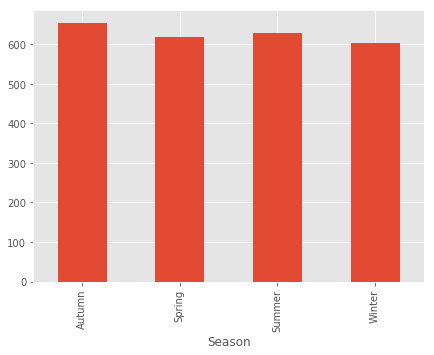

In [205]:
# You can still use the plot function, but specify which columns and plot type you would like to use
no_nans.groupby(by = ['Season']).mean().Counts.plot(kind = 'bar',figsize = (7, 5)) 

# #Figure title
# title("Mean Pedestrian Counts per Season")

# # x-axis label
# plt.xlabel('Mean Counts')

# #y-axis label
# plt.ylabel('Season')

## Boxplot
Box plots are good for viewing the spread of data within certain categories. These can be useful to measure whether two conditions could be said to be approximately equal, for example.

In [ ]:
fig = plt.figure(figsize = (6,8))
# ax = fig.gca() #defining axis

# The data and plot to use                                      
no_nans[['Season','Counts']][0:65000].boxplot(by = 'Season')

# # x-axis label
# plt.xlabel('Season')

# #y-axis label
# plt.ylabel('Mean Counts')

# #figure title
# title("Pedestrian Counts per Season")

# #If you want to SAVE your plot, make sure you do it BEFORE you show it in the notebook
# #plt.savefig('SeasonsBoxplot.png', dpi=300)

#Generating an image
plt.show()

## Histograms

Histograms let you observe the distribution of your (continuous) data, which means that it isn't suitable for all data types.

One thing we could use to observe, however, are how the average number of pedestrians per month is distributed

In [ ]:
#plt.hist takes the data you want to plot
plt.hist(no_nans.groupby(by = "Month").mean().Counts, bins = 12, normed = False)

#specifying the x-axis label
plt.xlabel('Mean Pedestrian Counts')

# the y-axis label
plt.ylabel('Frequency')

#Generating an image
plt.show()


## ScatterPlots

Scatter plots also allow you observe the relationship between two conditions within your data. This works best when you have two continuous variables. With the use of colours and shapes, you can also observe how certain conditions cluster throughout this relationship.

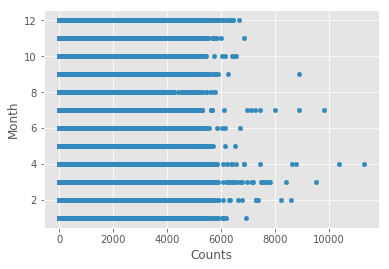

In [206]:
no_nans.plot(kind='scatter', x = "Counts", y = "Month")

plt.show()

Unfortunately we don't actually have two continuous variables within this dataset, so our scatter plot sorts according to their discrete categories.

Instead, let's try reading in the metadata for the sensor location, in the "pedestrian_sensor_locations.csv" file.

Tihs file contains latitude and longitude data, and would show a more ideal scatterplot projection.

In [207]:
sensorLt = pd.read_csv("pedestrian_sensor_locations.csv")
sensorLt.head()

,Sensor ID,Sensor Name,Sensor Description,Status,Upload Date,Year Installed,Location Type,Geometry,Latitude,Longitude
0,22,Eli274_T,Flinders St-Elizabeth St (East),Installed,19/08/2016 12:39:50 PM +0000,2013,Outdoor,"(-37.8178644478193, 144.965068228214)",-37.817864,144.965068
1,34,Fli32_T,Flinders St-Spark La,Installed,19/08/2016 12:39:50 PM +0000,2014,Outdoor,"(-37.8153798501116, 144.974150495806)",-37.815380,144.974150
2,11,WatCit_T,Waterfront City,Installed,19/08/2016 12:39:50 PM +0000,2009,Outdoor,"(-37.8154565643471, 144.939579299407)",-37.815457,144.939579
3,8,WebBN_T,Webb Bridge,Installed,19/08/2016 12:39:50 PM +0000,2009,Outdoor,"(-37.8229354263742, 144.947175106953)",-37.822935,144.947175
4,7,Fed_T,Birrarung Marr,Installed,19/08/2016 12:39:50 PM +0000,2009,Outdoor,"(-37.8183237506589, 144.971414820121)",-37.818324,144.971415


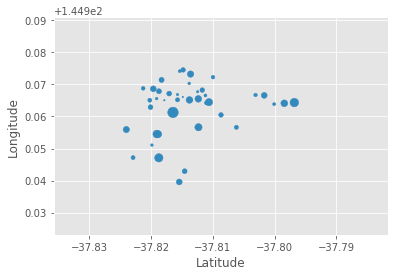

In [210]:
# Setting up a list of "area" values, scaled according to the mean pedestrian counts for each location

# This lets us create a size scale for our scatter plot points based on the proportion of pedestrians at each location
area = (pdsn.groupby("Location").mean().Counts)/(pdsn.groupby("Location").mean().Counts.max()) * 110

sensorLt.plot(kind='scatter', x = "Latitude", y = "Longitude", s = area)

plt.show()

# Summary

I hope this has been an informative, although limited, introduction into the plotting and functional capabilites of the Pandas library. There are still many things you can learn, and many other ways to use it. If you're stuck, don't be afraid to throw as many key words into Google Overlord as possible, and hope that the people at StackOverflow have been kind enough (and kind) to answer a similar question.

To keep you going on your journey, here are a few tutorials or Pandas-based problem sets you might like to use to practice:  
* [Github Repo 1](https://github.com/guipsamora/pandas_exercises)
* [Github Repo 2](https://github.com/ajcr/100-pandas-puzzles) (some of these might seem familiar)
* [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html)
* [Essential Basic Functionality](http://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html)
* [Pandas Dev recommended tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

Follow us on Twitter and Eventbrite to keep up-to-date on new and up-coming trainings
- [@ResPlat](https://twitter.com/resplat)
- [All currently planned Eventbrite trainings](https://www.eventbrite.com.au/o/research-platforms-services-10600096884)